In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

In [3]:
import warnings

# 경고 무시하기
warnings.filterwarnings("ignore")
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [4]:
df = pd.read_csv('강남구전세데이터_최종.csv')
df.drop(columns = {'Unnamed: 0'}, inplace=True)

In [5]:
df

,AD_Code,Admin_District,Area,YearBuilt,Type,Floor,Address,Cont_Date,Age,Latitude,Longitude,Star_Cnt,Michelin_Cnt,Mc_cnt,Bigstore_cnt,InterestRate,Market_cnt,Subway_cnt,y
0,0,개포동,44.00,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,1.75,0,0,7500
1,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-10-05,32,37.473722,127.052725,0,0,0,0,3.00,0,0,14333
2,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,2.25,0,0,17115
3,0,개포동,44.00,1991,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-07-07,32,37.473722,127.052725,0,0,0,0,2.25,0,0,17640
4,0,개포동,44.00,1989,단독다가구,3.0,서울특별시 강남구 논현로4길,2022-06-01,34,37.473722,127.052725,0,0,0,0,1.75,0,0,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,2,대치동,66.64,2004,오피스텔,8.0,서울특별시 강남구 역삼로 432,2019-07-22,19,37.501439,127.054330,0,1,0,0,1.50,0,0,45000
87357,13,청담동,43.68,2005,오피스텔,5.0,서울특별시 강남구 압구정로 461,2019-06-21,18,37.525283,127.047239,1,9,0,2,1.75,0,0,38000
87358,13,청담동,31.57,2014,오피스텔,5.0,서울특별시 강남구 도산대로 406,2019-07-20,9,37.522821,127.039963,0,22,1,2,1.50,0,0,23500
87359,0,개포동,29.51,2020,오피스텔,6.0,서울특별시 강남구 논현로20길 12,2020-09-08,3,37.478097,127.045854,0,0,0,0,0.50,0,0,3000


In [6]:
df.describe()

,AD_Code,Area,YearBuilt,Floor,Age,Latitude,Longitude,Star_Cnt,Michelin_Cnt,Mc_cnt,Bigstore_cnt,InterestRate,Market_cnt,Subway_cnt,y
count,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,8.736100e+04
mean,5.422694,67.776567,2000.491901,6.859915,22.508099,37.498124,127.057102,21.634997,79.506198,29.297776,88.798194,1.317124,16.187624,563.986527,5.921226e+04
std,4.148519,37.183271,12.485836,5.758265,12.485836,0.015544,0.022320,95.410359,342.298948,121.617146,292.396927,0.672580,81.669151,1300.745319,4.606194e+04
min,0.000000,11.390000,1972.000000,-1.000000,0.000000,37.460288,127.018254,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,4.500000e+02
25%,2.000000,40.560000,1992.000000,3.000000,10.000000,37.488198,127.040612,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,2.520000e+04
50%,4.000000,59.920000,2002.000000,5.000000,21.000000,37.496665,127.051556,0.000000,0.000000,0.000000,0.000000,1.250000,0.000000,21.000000,4.650000e+04
75%,9.000000,84.930000,2013.000000,10.000000,31.000000,37.508595,127.068504,0.000000,0.000000,0.000000,17.000000,1.750000,0.000000,402.000000,8.000000e+04
max,13.000000,301.470000,2023.000000,67.000000,51.000000,37.533026,127.112686,733.000000,3128.000000,928.000000,2389.000000,3.250000,537.000000,5938.000000,1.100000e+06


In [7]:
df.describe(include = 'object')

,Admin_District,Type,Address,Cont_Date
count,87361,87361,87361,87361
unique,14,4,3729,1821
top,역삼동,아파트,서울특별시 강남구 삼성로 212,2022-05-11
freq,14741,53963,2969,155


In [8]:
df['y'].mean()

59212.25829603599

In [9]:
# 중복된 값을 제거
df['y'].drop_duplicates().mean()

68727.807

In [10]:
df['y'].quantile(0.25)

25200.0

In [11]:
df['y'].quantile([0.25,0.5,0.75])

0.25    25200.0
0.50    46500.0
0.75    80000.0
Name: y, dtype: float64

In [12]:
# 90%는 얼마인지?
pd.Series([1,2,3,4,5]).quantile(0.9)

4.6

In [13]:
house_sold = df['y'] < 80000.0

In [14]:
house_sold.mean()

0.7462597726674374

In [15]:
df['y'].var()

2121702395.9183118

In [16]:
df['y'].std()

46061.940861391326

In [17]:
df['YearBuilt'].mode()

0    2014
Name: YearBuilt, dtype: int64

In [18]:
df.mean(numeric_only=True)

AD_Code             5.422694
Area               67.776567
YearBuilt        2000.491901
Floor               6.859915
Age                22.508099
Latitude           37.498124
Longitude         127.057102
Star_Cnt           21.634997
Michelin_Cnt       79.506198
Mc_cnt             29.297776
Bigstore_cnt       88.798194
InterestRate        1.317124
Market_cnt         16.187624
Subway_cnt        563.986527
y               59212.258296
dtype: float64

In [19]:
# 행개수, 칼럼개수 
print(df.shape)

(87361, 19)


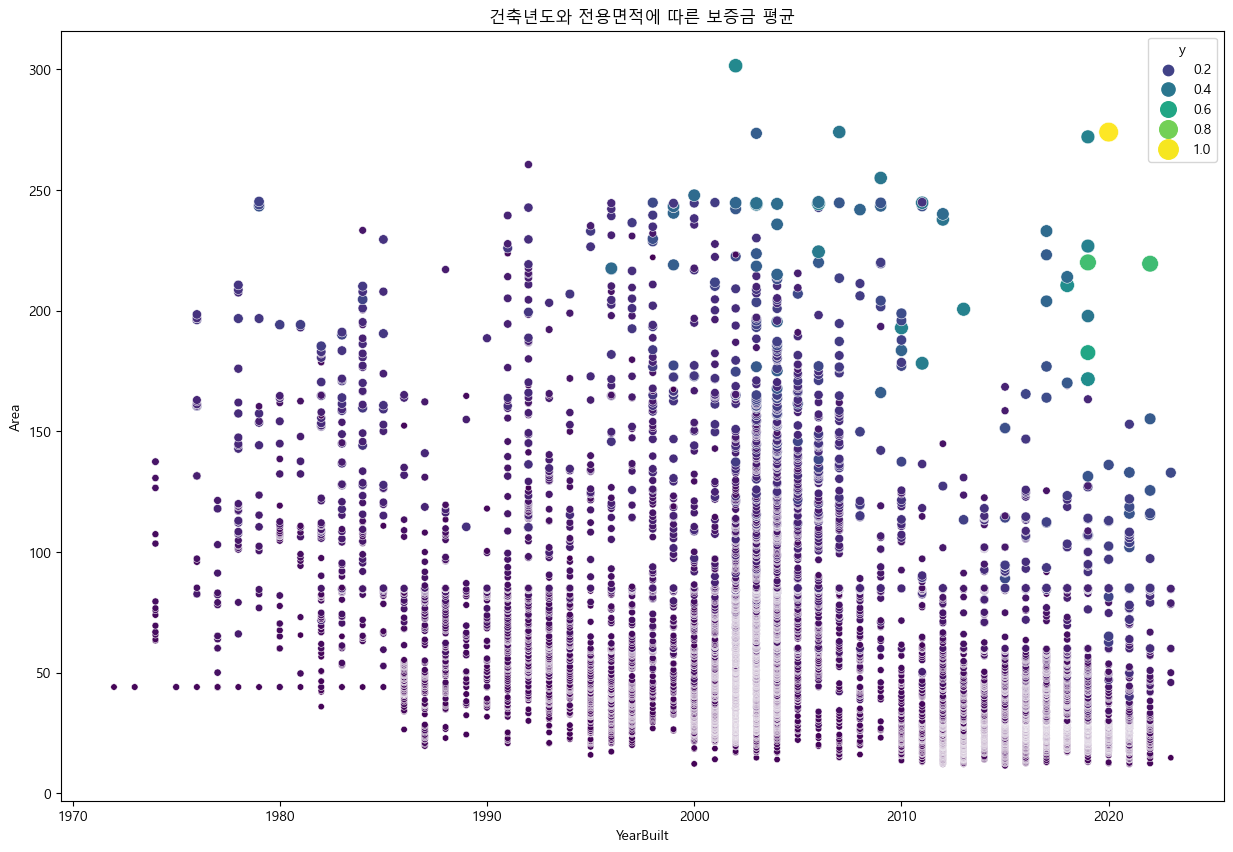

In [20]:
# groupby 적극적 사용

grouped_df = df.groupby(['YearBuilt', 'Area']).agg({
    'y': 'mean',
    'Floor': 'mean',
    'Age': 'mean',
    'Latitude': 'mean',
    'Longitude': 'mean',
    'Star_Cnt': 'sum',
    'Michelin_Cnt': 'sum',
    'Mc_cnt': 'sum',
    'Bigstore_cnt': 'sum',
    'InterestRate': 'mean'
}).reset_index()

plt.figure(figsize=(15, 10))

# 예시: 건축년도와 전용면적에 따른 보증금 평균 시각화
sns.scatterplot(data=grouped_df, x='YearBuilt', y='Area', size='y', sizes=(20, 200), hue='y', palette='viridis')

plt.title('건축년도와 전용면적에 따른 보증금 평균')
plt.xlabel('YearBuilt')
plt.ylabel('Area')
plt.legend(title='y')
plt.show()


In [21]:
# 분포 요약하기

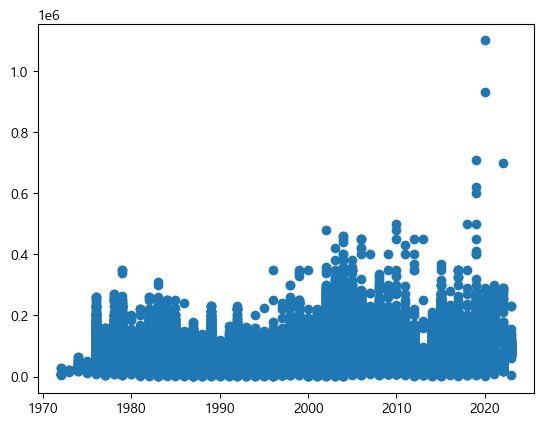

In [22]:
import matplotlib.pyplot as plt
plt.scatter(df['YearBuilt'], df['y'])
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87361 entries, 0 to 87360
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AD_Code         87361 non-null  int64  
 1   Admin_District  87361 non-null  object 
 2   Area            87361 non-null  float64
 3   YearBuilt       87361 non-null  int64  
 4   Type            87361 non-null  object 
 5   Floor           87361 non-null  float64
 6   Address         87361 non-null  object 
 7   Cont_Date       87361 non-null  object 
 8   Age             87361 non-null  int64  
 9   Latitude        87361 non-null  float64
 10  Longitude       87361 non-null  float64
 11  Star_Cnt        87361 non-null  int64  
 12  Michelin_Cnt    87361 non-null  int64  
 13  Mc_cnt          87361 non-null  int64  
 14  Bigstore_cnt    87361 non-null  int64  
 15  InterestRate    87361 non-null  float64
 16  Market_cnt      87361 non-null  int64  
 17  Subway_cnt      87361 non-null 

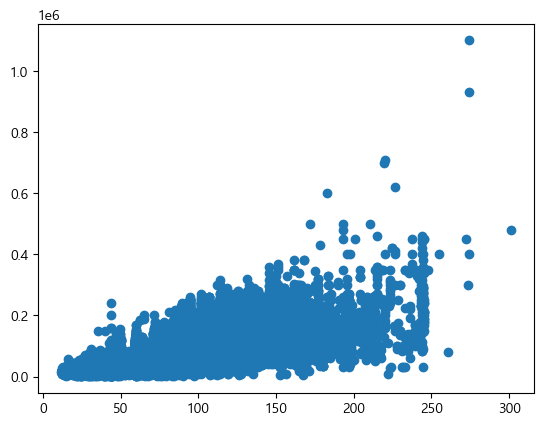

In [24]:
plt.scatter(df['Area'], df['y'])
plt.show()

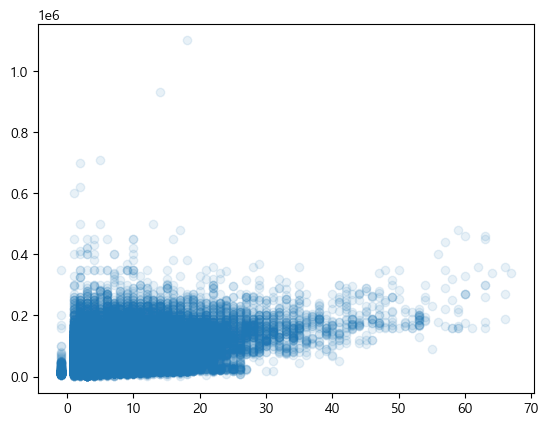

In [25]:
# 데이터 밀도 파악 더 쉬움.
plt.scatter(df['Floor'], df['y'], alpha=0.1)
plt.show()

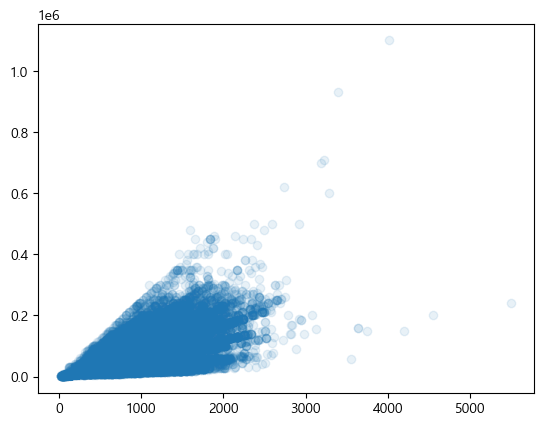

In [26]:
# 각 전용면적 당 보증금 계산
# 
average_borrows = df['y']/df['Area']
plt.scatter(average_borrows, df['y'], alpha=0.1)
plt.show()

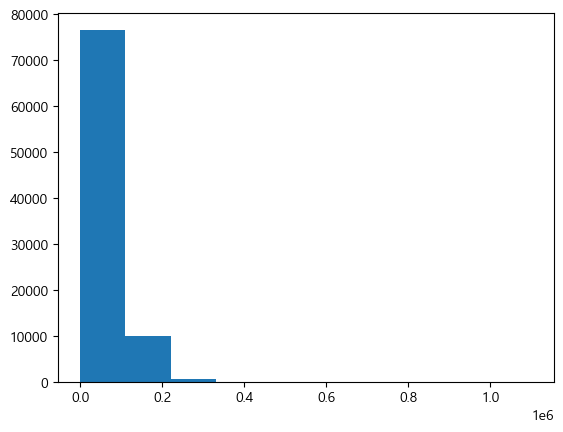

In [27]:
plt.hist(df['y'])
plt.show()

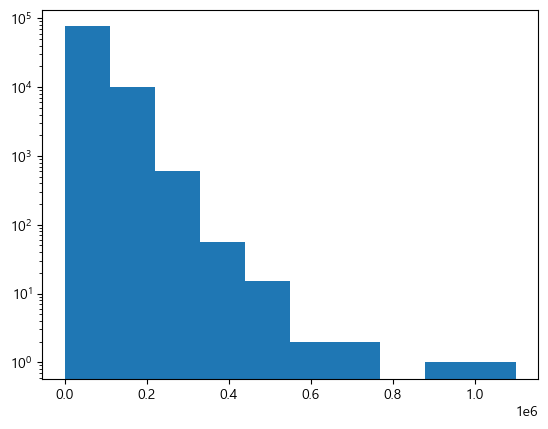

In [28]:
plt.hist(df['y'], log = True)
plt.show()

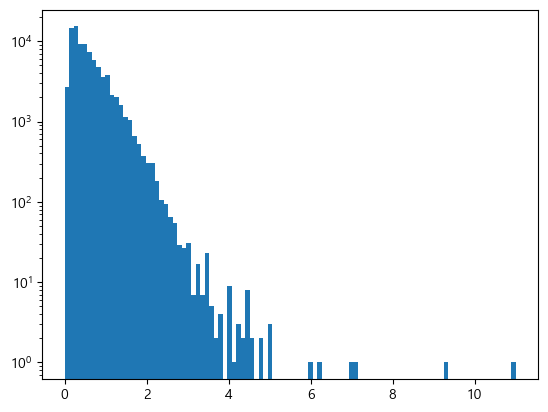

In [29]:
# 100개의 히스토그램 막대
plt.hist(df['y'], bins=100)
plt.yscale('log')
plt.xticks([0, 200000, 400000, 600000, 800000, 1000000], [0, 2, 4, 6, 8, 10])
plt.show()

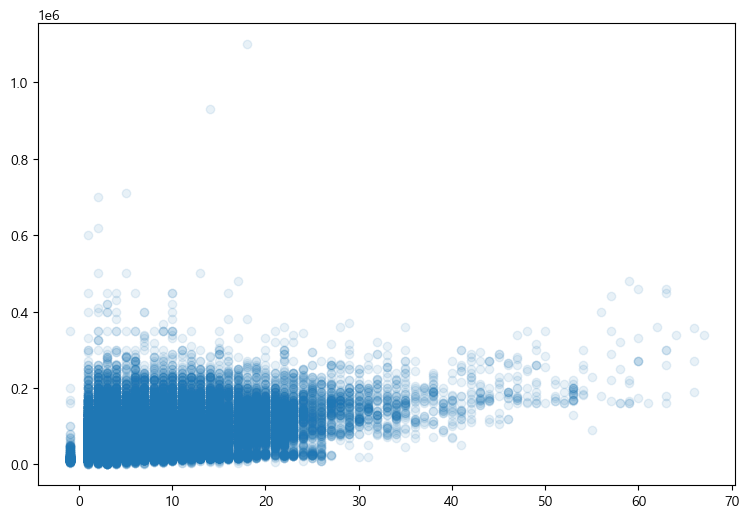

In [30]:
# figure로 그래프 다루기
# 커지죠?
plt.figure(figsize=(9, 6))
plt.scatter(df['Floor'], df['y'], alpha=0.1)
plt.show()

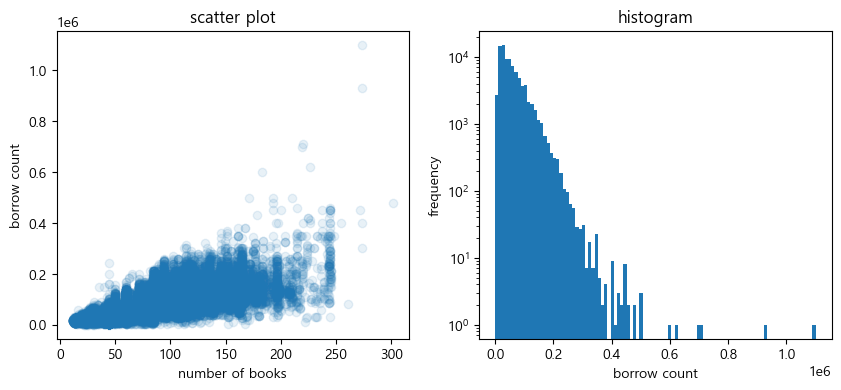

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df['Area'], df['y'], alpha=0.1)
axs[0].set_title('scatter plot')
axs[0].set_xlabel('number of books')
axs[0].set_ylabel('borrow count')

axs[1].hist(df['y'], bins=100)
axs[1].set_title('histogram')
axs[1].set_yscale('log')
axs[1].set_xlabel('borrow count')
axs[1].set_ylabel('frequency')

fig.show()

In [32]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import font_manager
import matplotlib.pyplot as plt
font_name = "Malgun Gothic" 

sns.set(font_scale=1.5, font=font_name)
sns.set_style("white")
sns.set_palette("Blues_r")

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

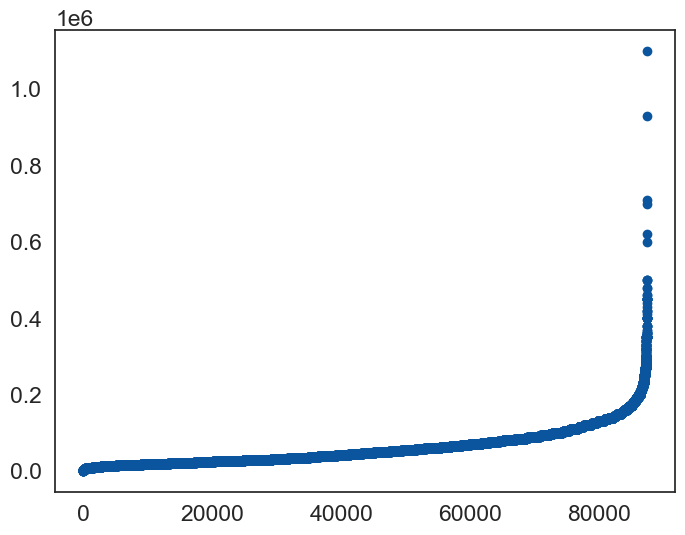

In [33]:
# 타깃값이 가장 중요하다
# 이상치 확인

plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df['y'].values))
plt.show()

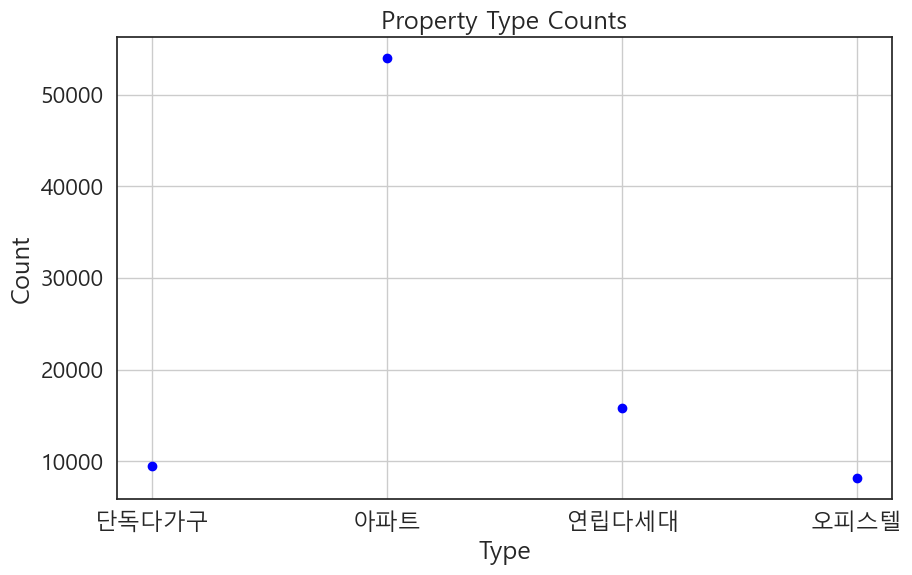

In [34]:
plt.rcParams['font.family'] = 'Malgun Gothic'
count_by_category = df['Type'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.scatter(count_by_category.index, count_by_category.values, color='blue', marker='o')
plt.title('Property Type Counts')
plt.xlabel('Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='y', ylabel='Density'>

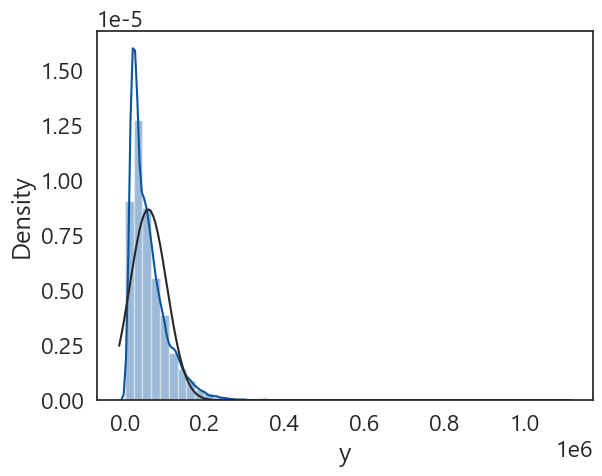

In [35]:
# 타깃변수의 정규성을 보자. 
# 로그하자..
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.distplot(df['y'], fit=stats.norm)

<AxesSubplot:xlabel='y', ylabel='Density'>

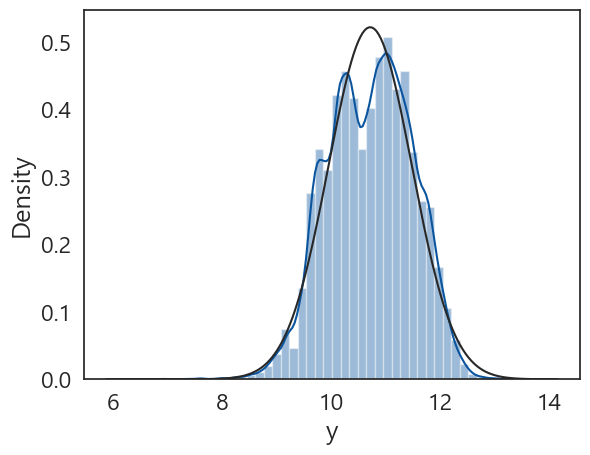

In [36]:
# 10억~ 12억 
sns.distplot(np.log1p(df['y']), fit=stats.norm)

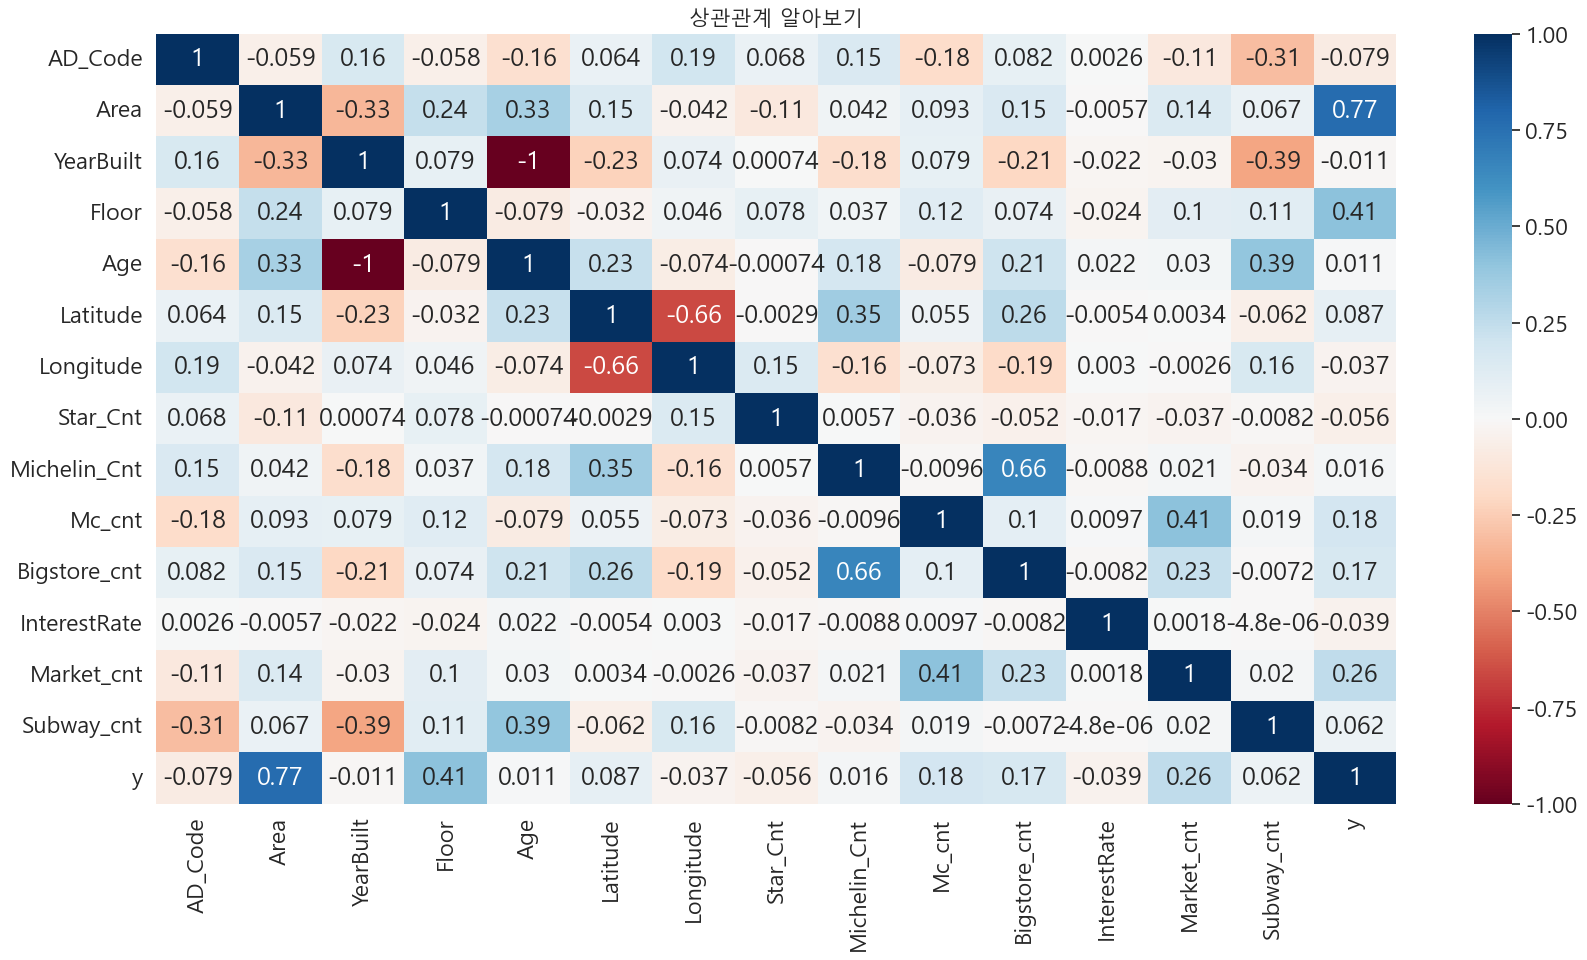

In [37]:
# 이상치 제거가 시급하다.

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="RdBu", annot=True)
plt.title("상관관계 알아보기", size=15)
plt.show()

In [38]:
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

SyntaxError: invalid syntax (1854386929.py, line 1)

<AxesSubplot:xlabel='y', ylabel='Density'>

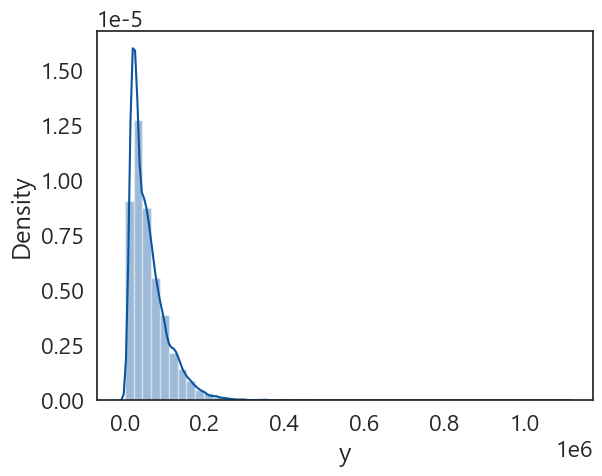

In [39]:
sns.distplot(df['y'])

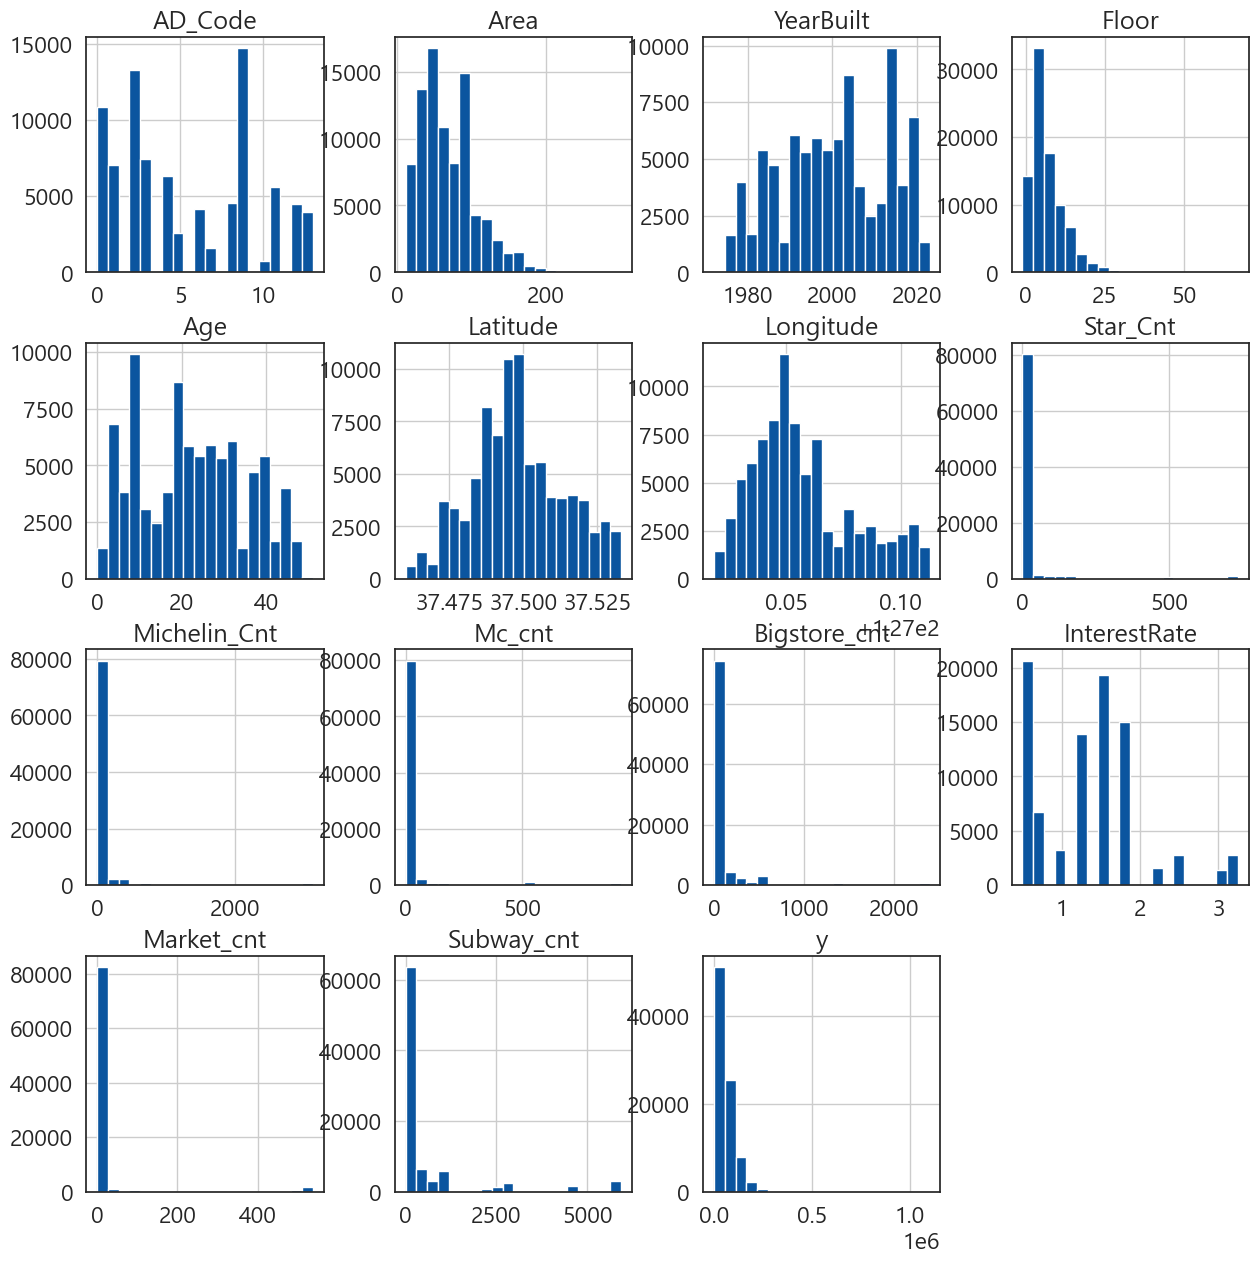

In [40]:
# 아 정규분포를 보이는 것도 있고 아닌 것도 있네

df.hist(bins=20, figsize=(15,15))
plt.show()

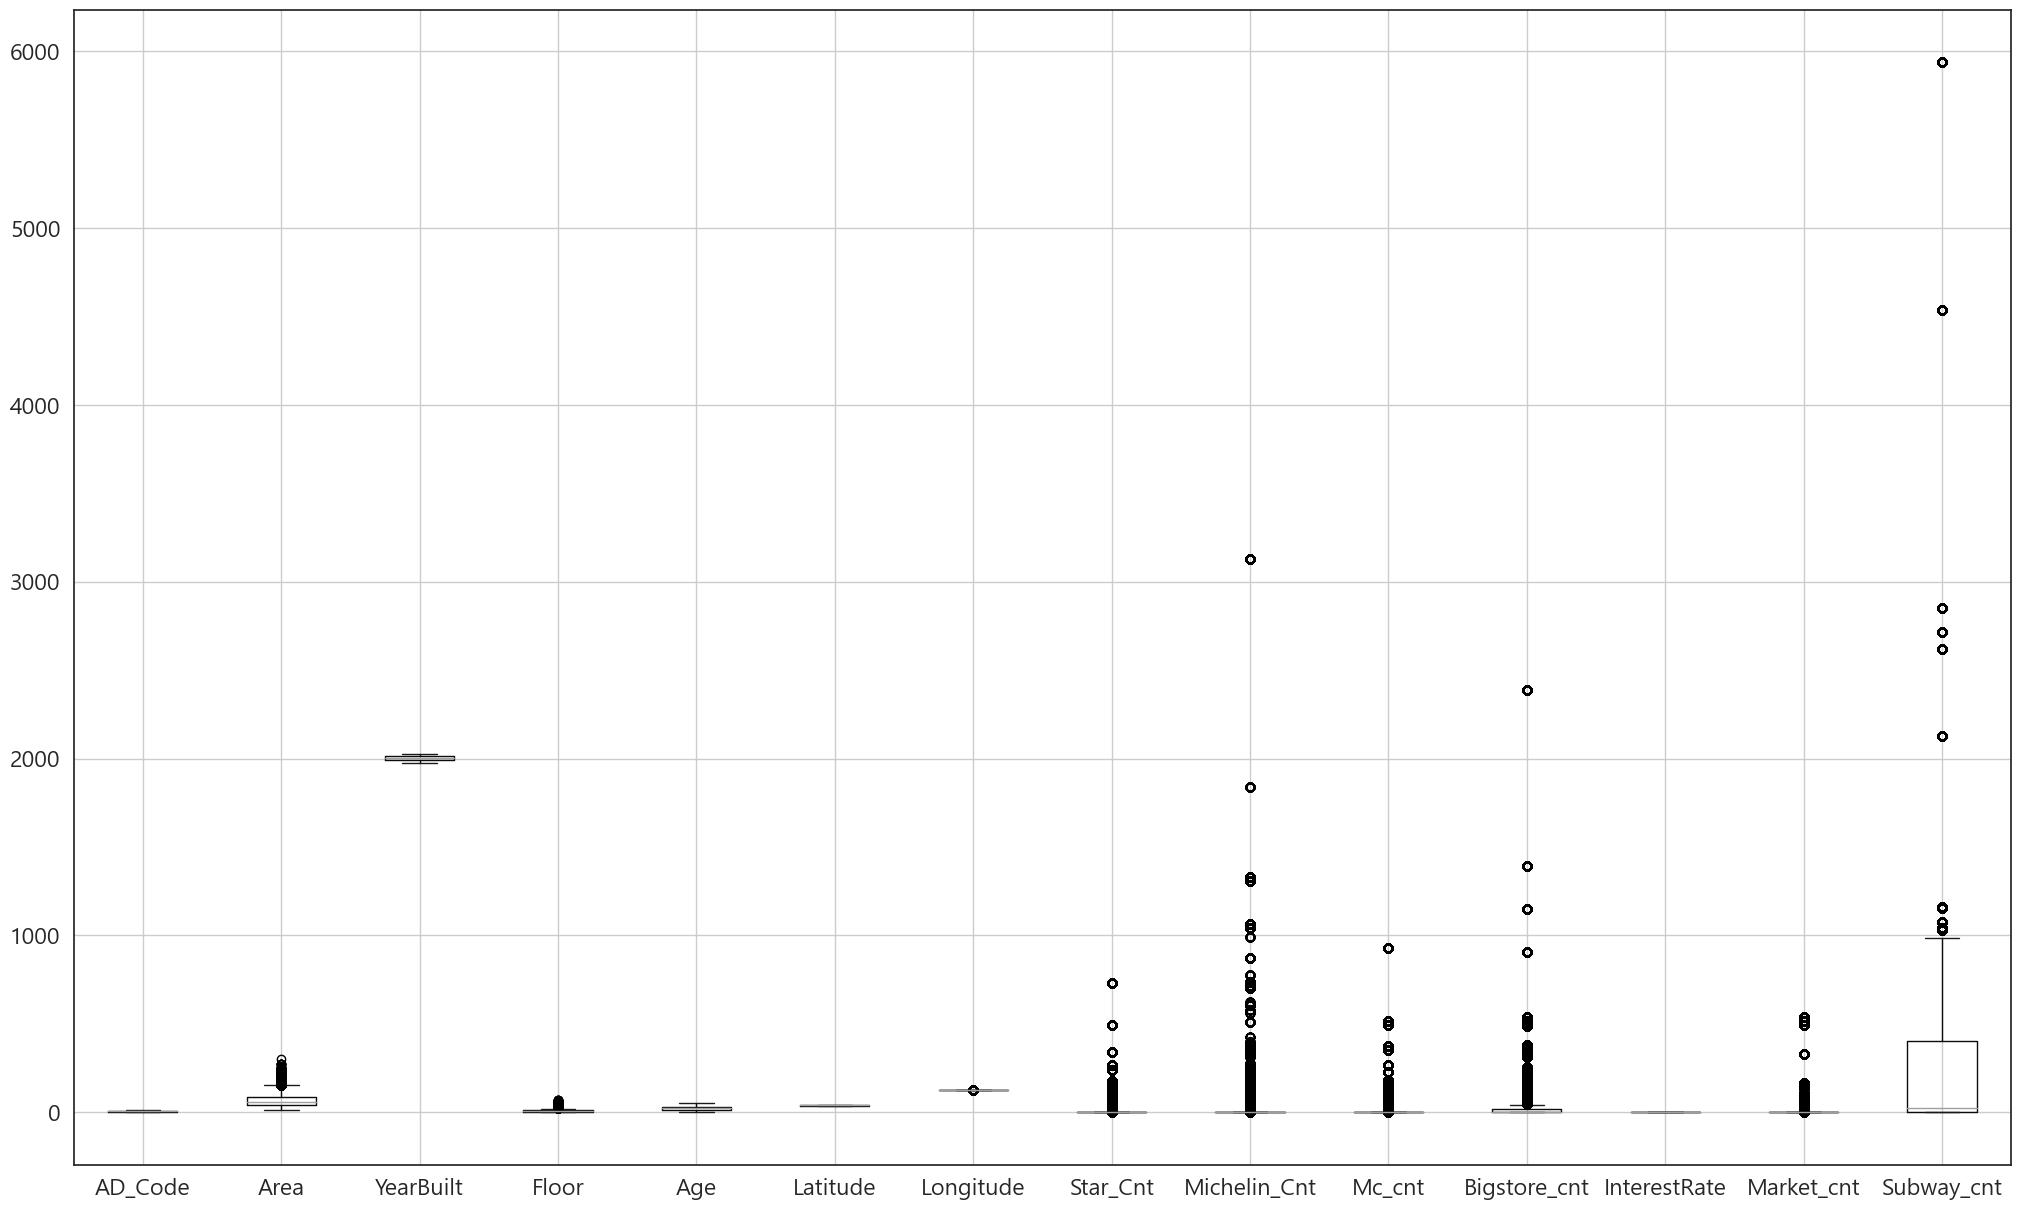

In [41]:
# 보증금이 값이 크니 없앰
df1=df.drop(['y'], axis=1)
df1.boxplot(figsize=(25,15))
plt.show()

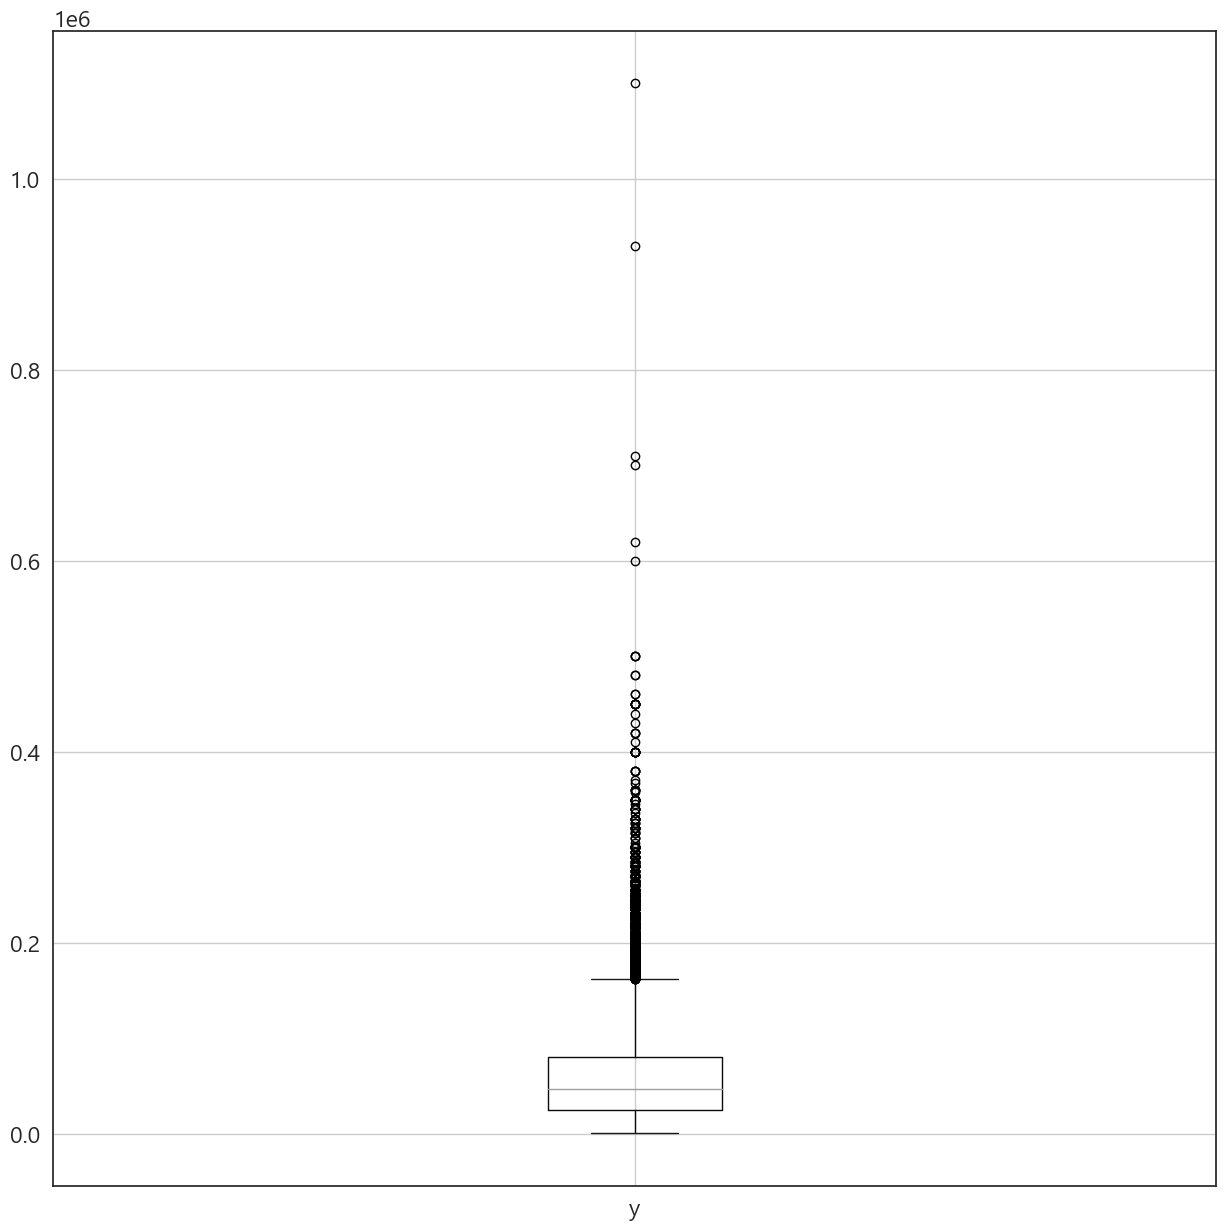

In [42]:
df.loc[:,['y']].boxplot(figsize=(15,15))
plt.show()

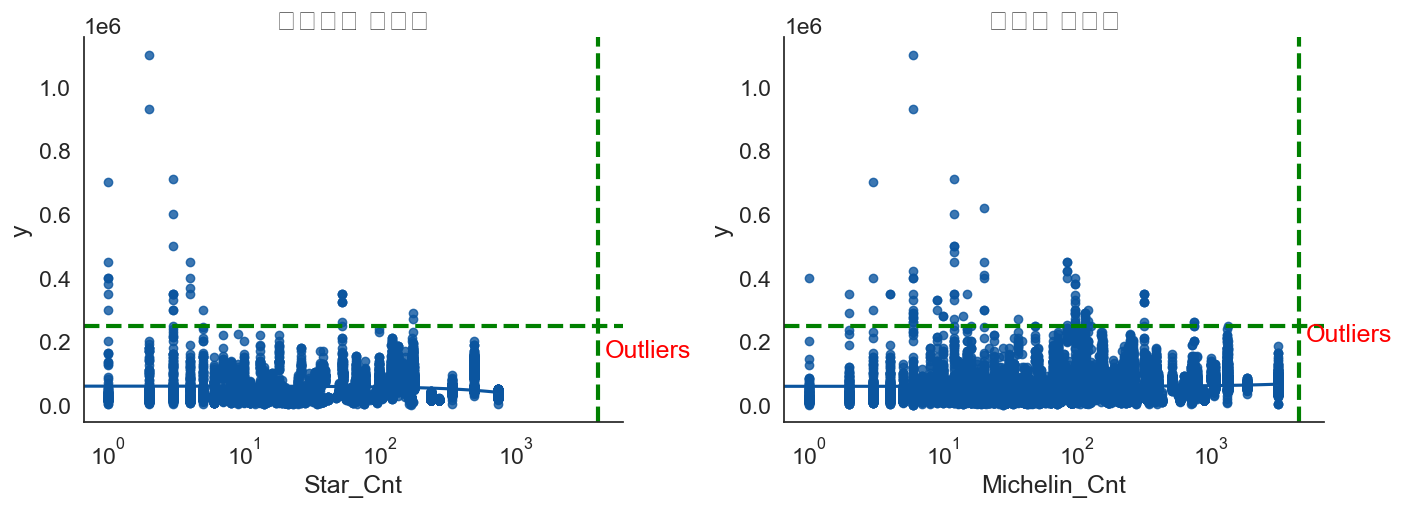

In [43]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("Blues_r")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.3)
ax1 = sns.regplot(data=df, x='Star_Cnt',y='y')
ax1.set_title('스타벅스 이상치',fontsize=20)
plt.axhline(y=250000, color='Green', linestyle='--', linewidth=3)
plt.axvline(x=4000, color='Green', linestyle='--', linewidth=3)
plt.text(4500, 150000, 'Outliers',color='red')
plt.xscale('log') 
plt.subplot(1,2,2)
ax2 = sns.regplot(data=df, x='Michelin_Cnt',y='y')
ax2.set_title('미쉐린 이상치',fontsize=20)
plt.axhline(y=250000, color='Green', linestyle='--', linewidth=3)
plt.axvline(x=4500, color='Green', linestyle='--', linewidth=3)
plt.text(5000, 200000, 'Outliers',color='red')
plt.xscale('log') 
sns.despine()

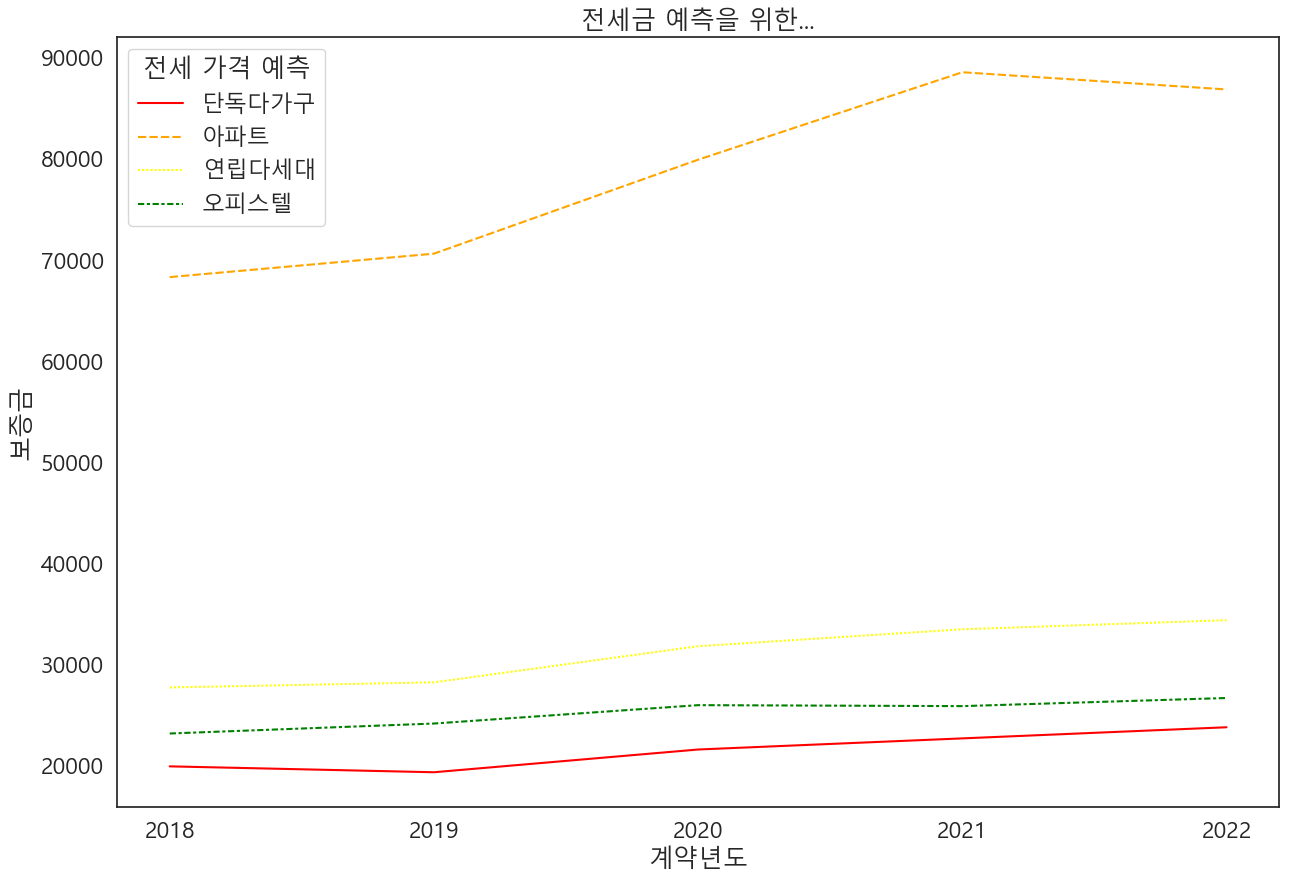

In [44]:
df['Cont_Date'] = pd.to_datetime(df['Cont_Date'])
df['계약년'] = df['Cont_Date'].dt.year.astype(int)
df
# groupby사용

plt.rcParams['font.family'] = 'Malgun Gothic'
df2 = df.groupby(['계약년', 'Type'])['y'].mean().reset_index()

pivot_df_day = df2.pivot(index='계약년', columns='Type', values='y')

day_names = ['2018','2019','2020','2021','2022']
pivot_df_day.index = day_names

plt.figure(figsize=(15, 10))

# 색상 설정
line_colors = ['red', 'orange', 'yellow', 'green']

sns.lineplot(data=pivot_df_day, palette=line_colors)

plt.title('전세금 예측을 위한...')
plt.xlabel('계약년도')
plt.ylabel('보증금')
plt.legend(title='전세 가격 예측')
plt.show()


In [45]:
pivot_df_day.describe()

Type,단독다가구,아파트,연립다세대,오피스텔
count,4.000000,5.000000,5.000000,5.000000
mean,21168.255440,78847.300494,31129.356263,25180.154750
std,1994.459264,9197.676491,3020.010829,1453.780808
min,19348.430322,68301.763788,27733.710547,23178.856698
25%,19785.523870,70617.764096,28237.910621,24164.869212
50%,20764.022112,79908.886447,31808.498981,25885.853821
75%,22146.753681,86854.156044,33483.211111,25982.177200
max,23796.547214,88553.932096,34383.450056,26689.016820
